# Importing necessary tools

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

# Custom Training

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%cd /content/drive/MyDrive/kibo

/content/drive/MyDrive/kibo


In [9]:
%cd /content/drive/MyDrive/kibo

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=20 imgsz=224 batch=32 plots=True

/content/drive/MyDrive/kibo
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=20, patience=50, batch=32, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, works

# Analysing the result.

In [13]:
!ls runs/detect/train11/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1718859807.93290366fd33.2236.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch230.jpg	   val_batch2_labels.jpg
P_curve.png					    train_batch231.jpg	   val_batch2_pred.jpg
PR_curve.png					    train_batch232.jpg	   weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


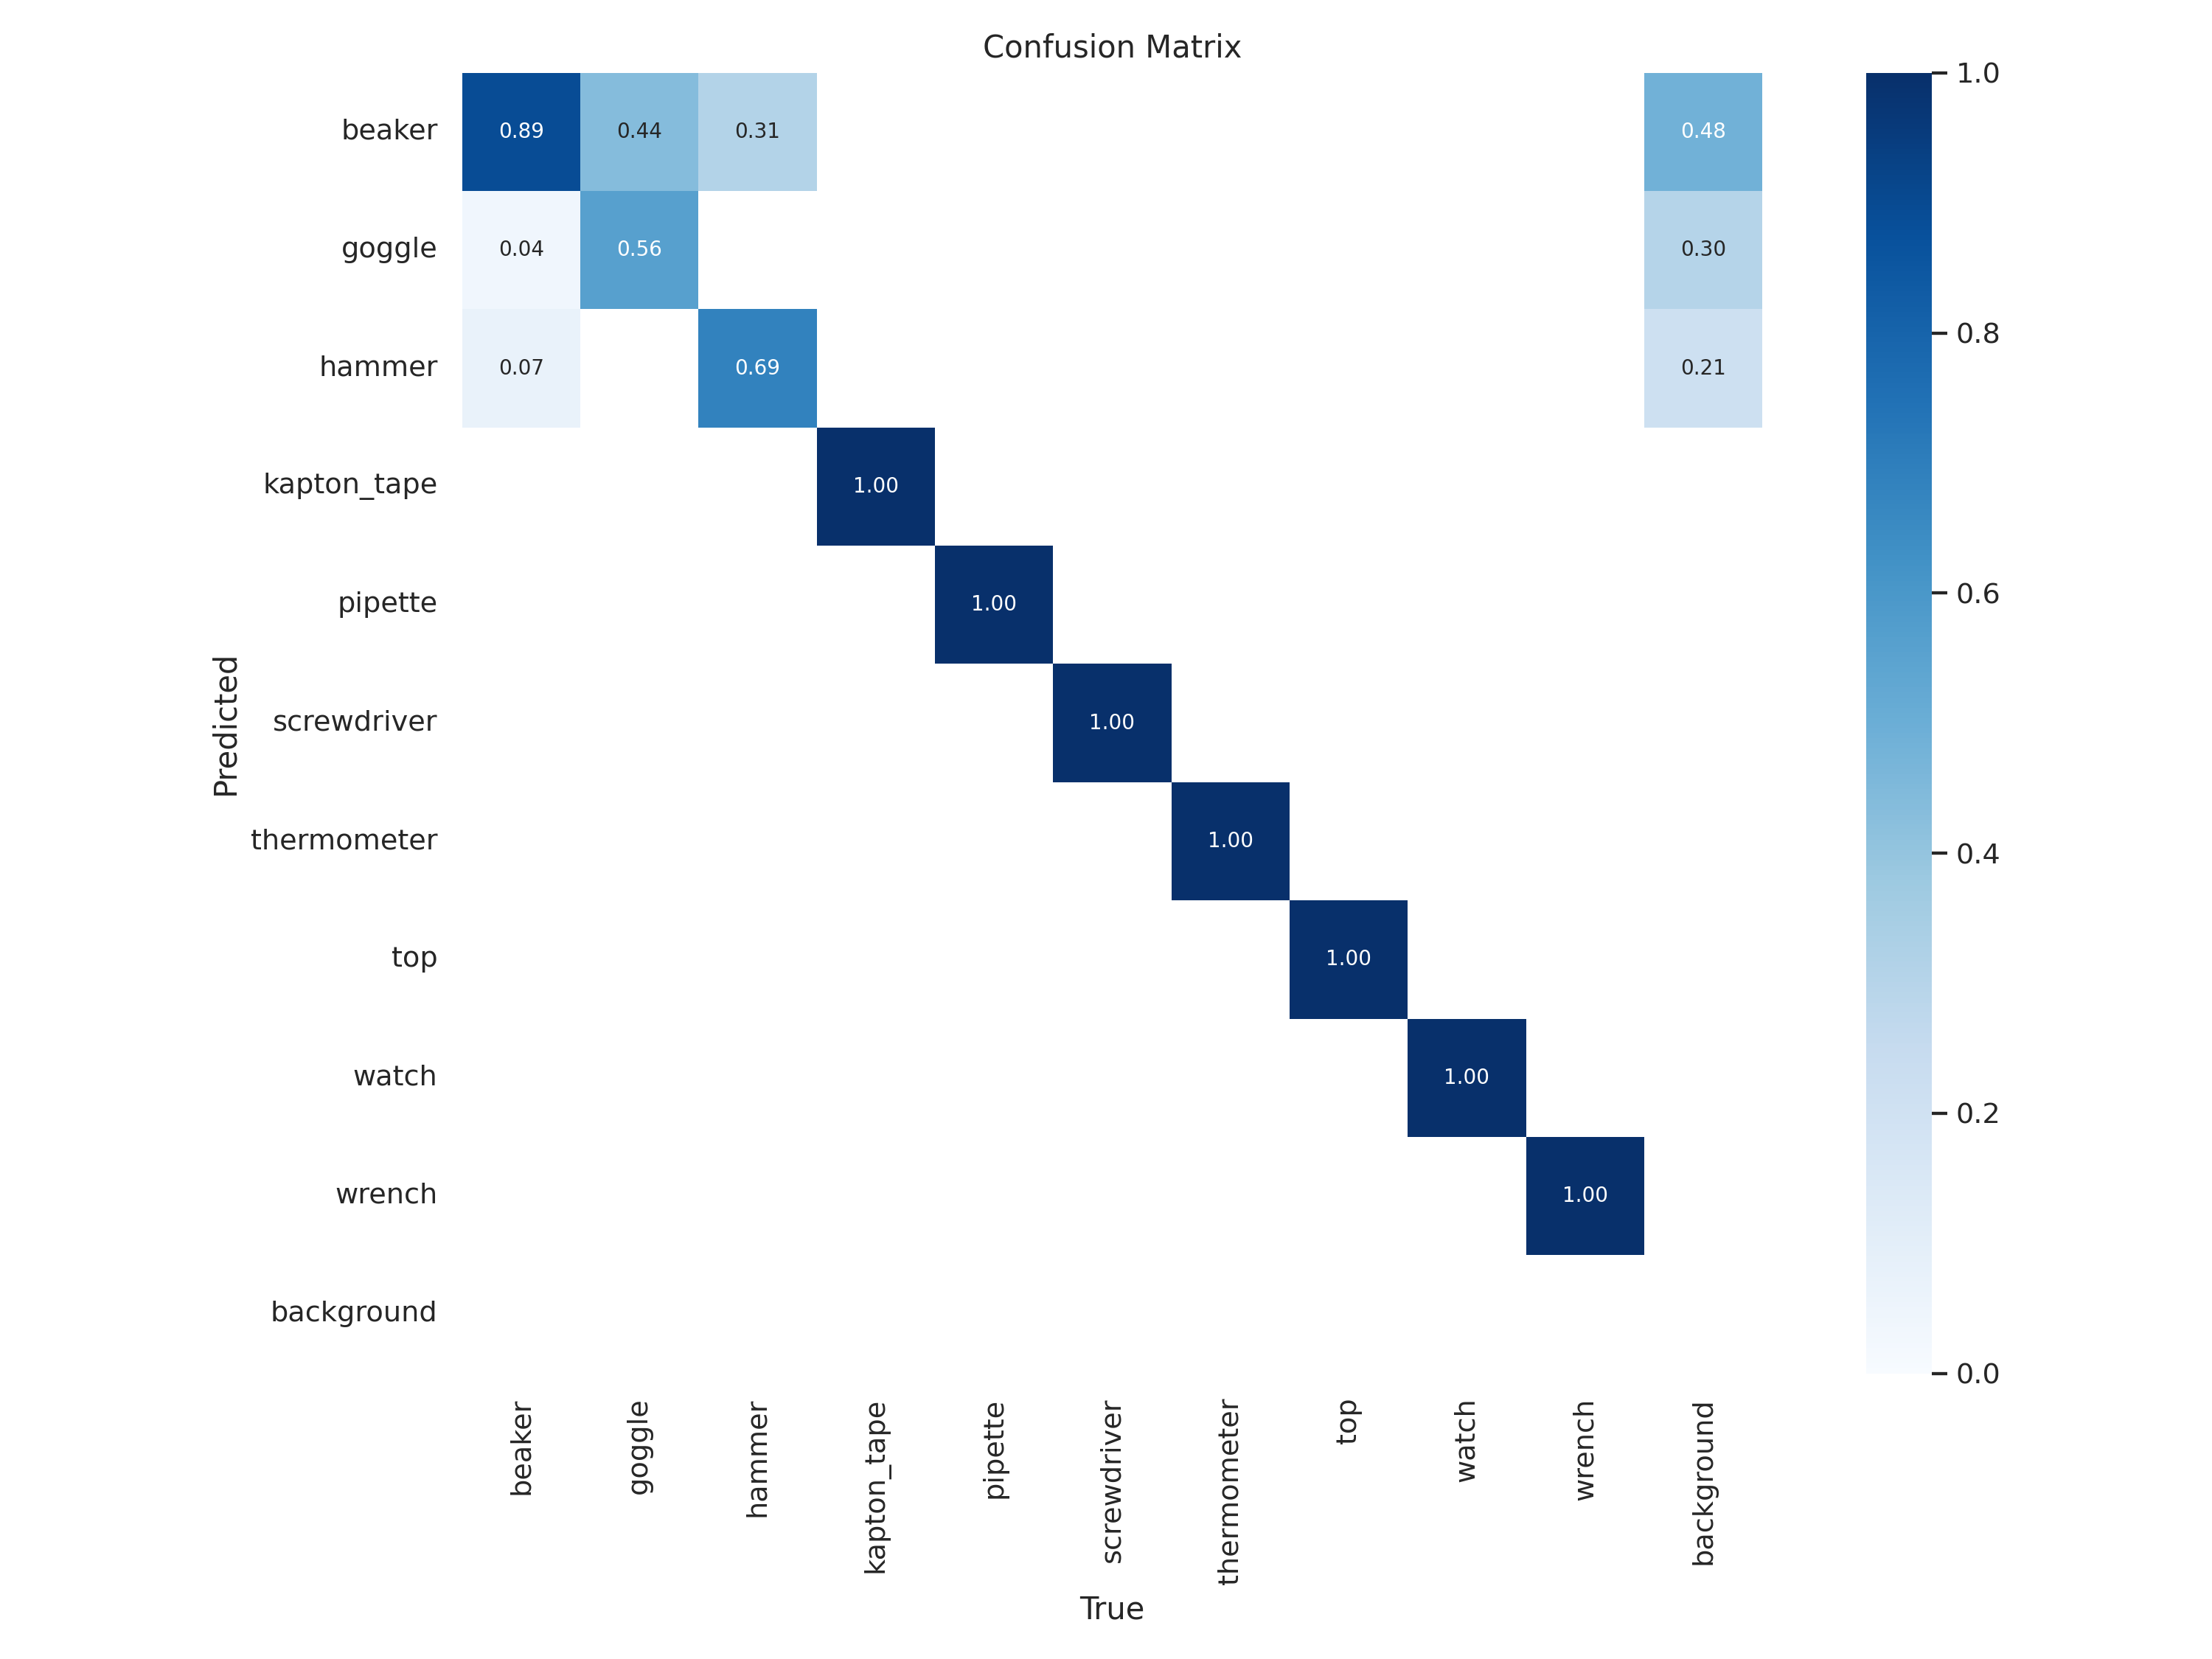

In [12]:
Image(filename='runs/detect/train11/confusion_matrix.png', width=600)

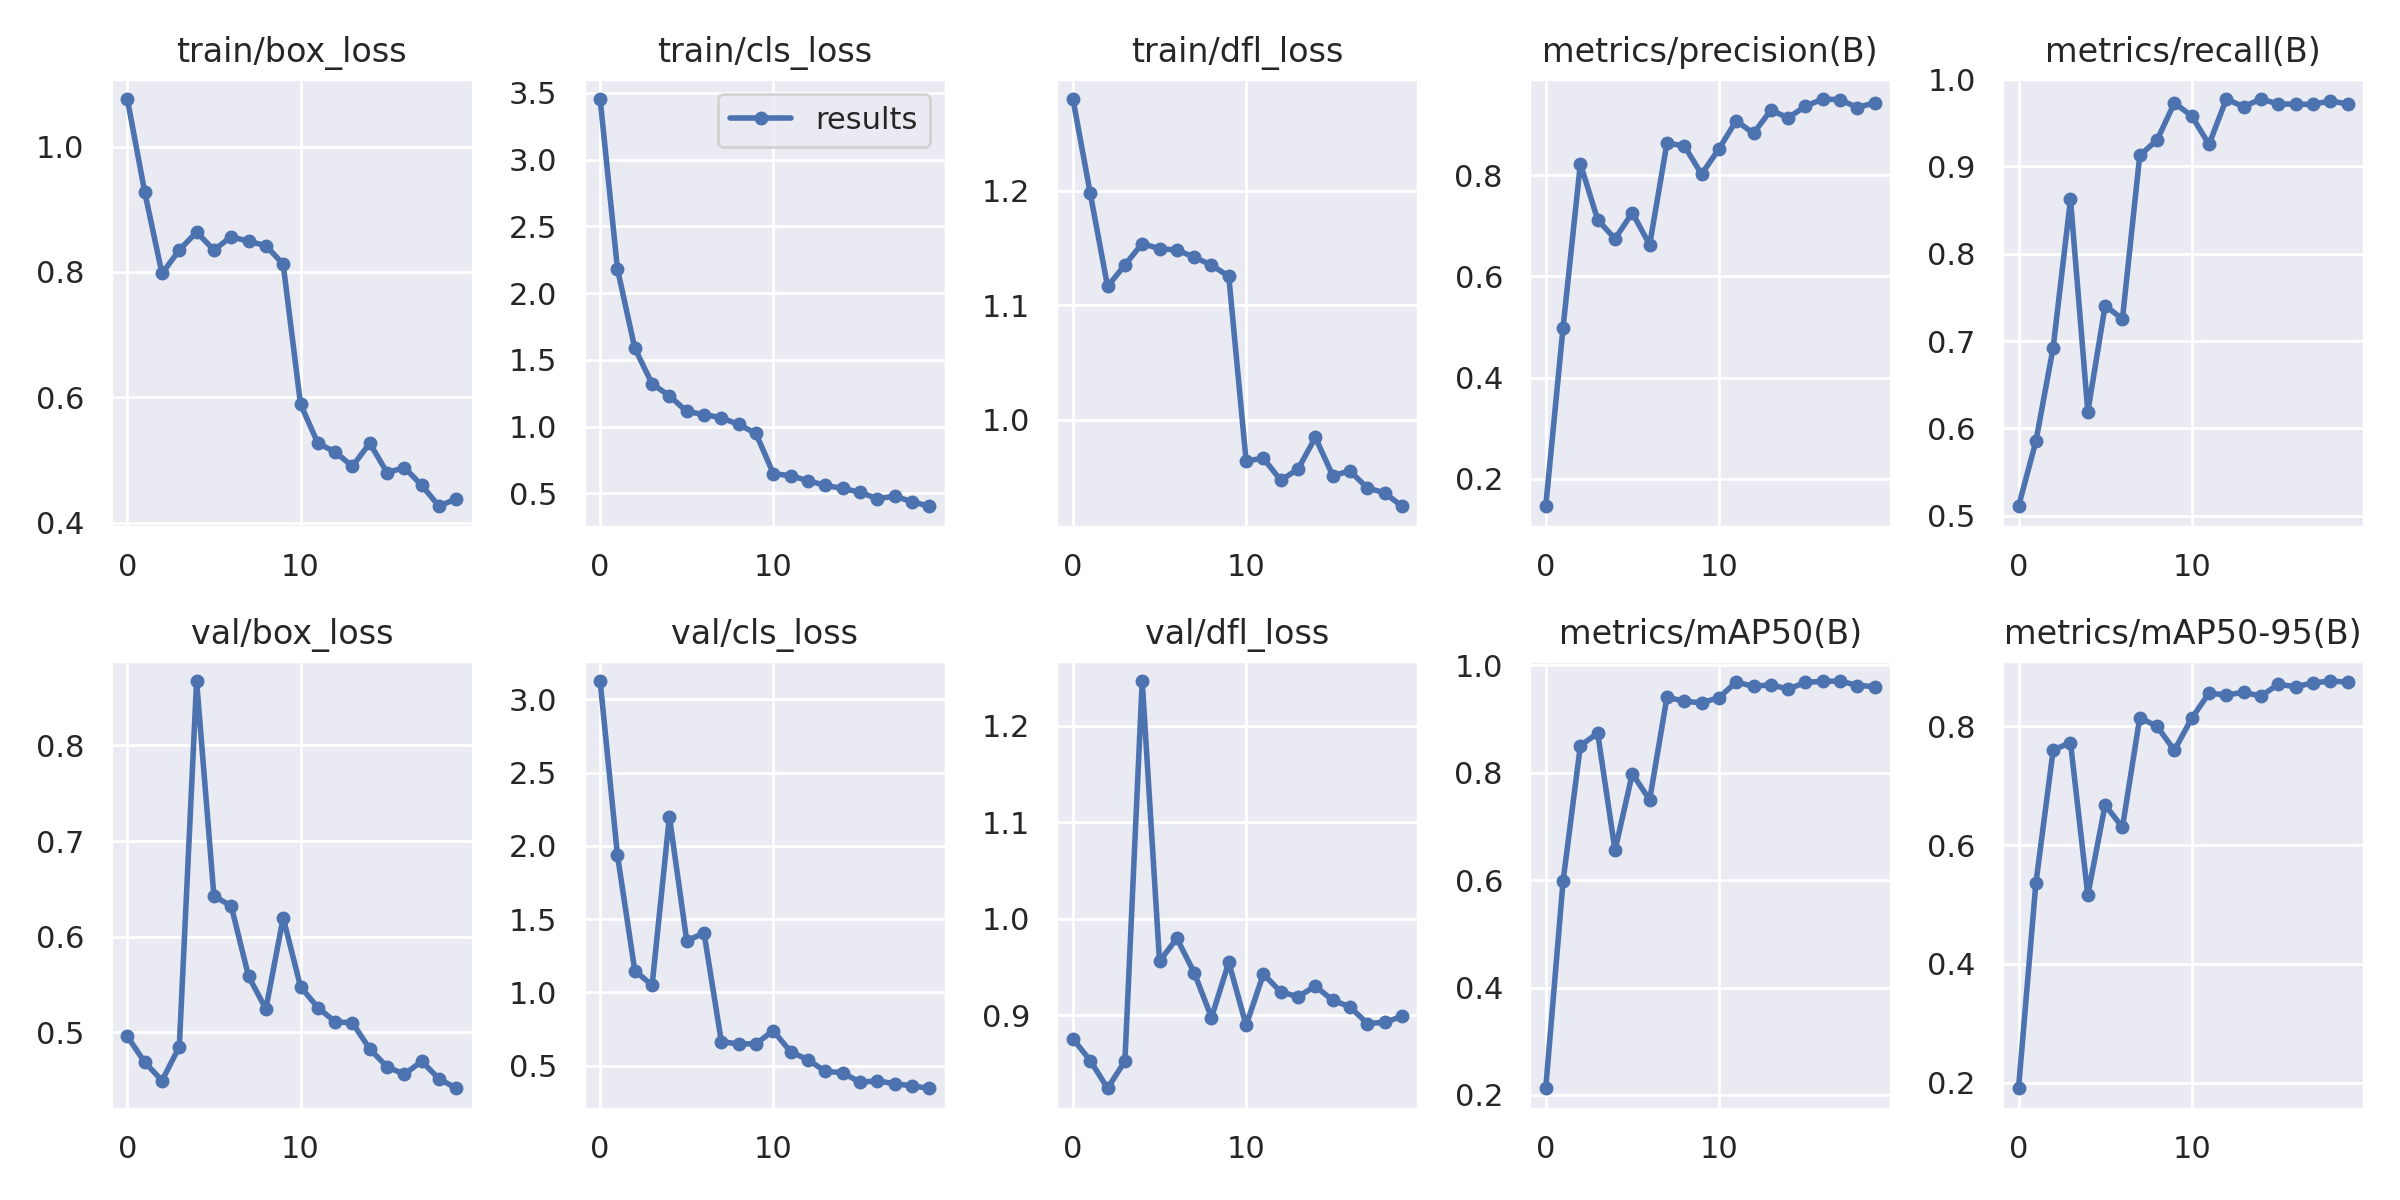

In [14]:
Image(filename='runs/detect/train11/results.png', width=600)

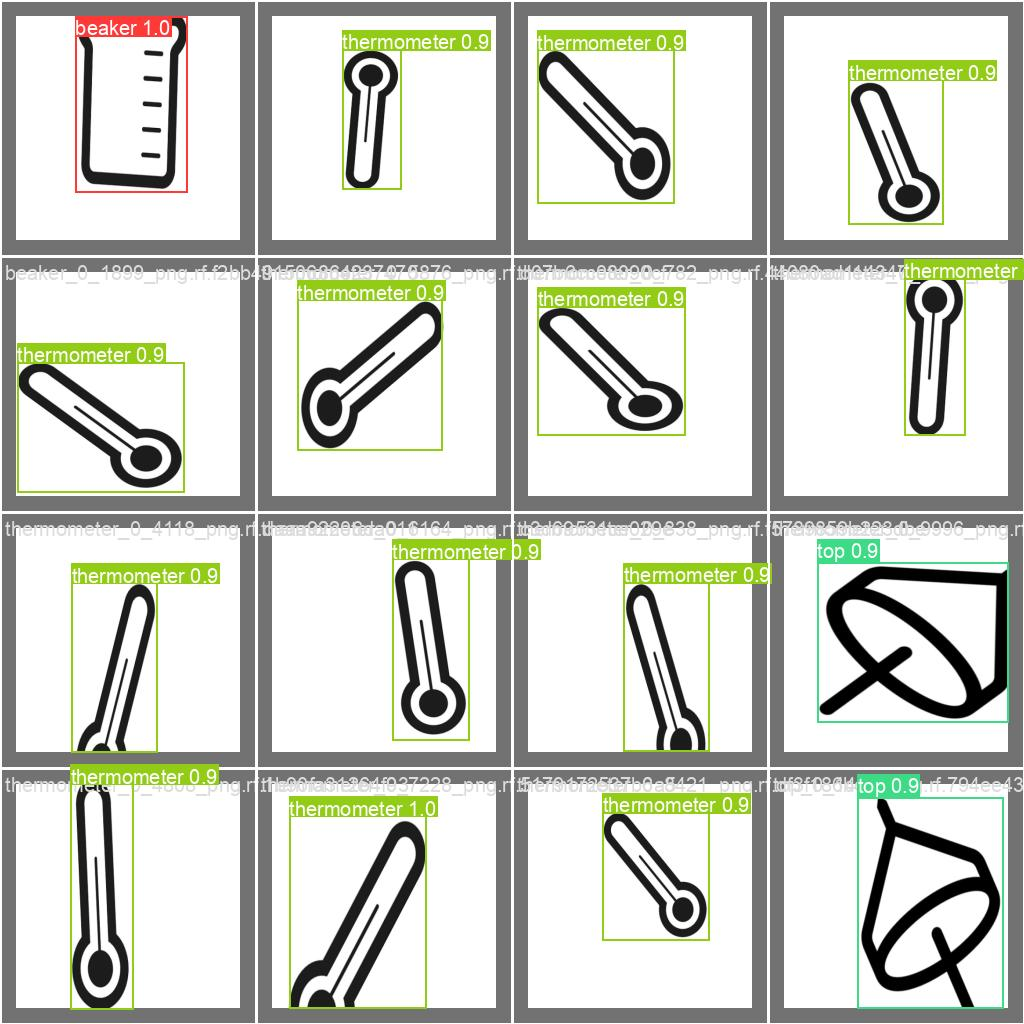

In [15]:
Image(filename='runs/detect/train11/val_batch0_pred.jpg', width=600)

In [16]:
!yolo task=detect mode=val model=runs/detect/train11/weights/best.pt data=data.yaml

2024-06-20 06:34:57.729291: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 06:34:57.729352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 06:34:57.734310: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-20 06:34:57.760019: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 06:34:59.439169: W tensorflow/compiler/tf2

# Predicting the test images.

In [22]:
!yolo task=detect mode=predict model=runs/detect/train11/weights/best.pt conf=0.25 source=/content/drive/MyDrive/kibo/Label_dataset/test/images/

2024-06-20 07:03:29.342578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 07:03:29.342636: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 07:03:29.344774: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-20 07:03:29.355883: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 07:03:30.863320: W tensorflow/compiler/tf2

# Conversion from `.pt` to `.onnx`

In [25]:
model = YOLO('/content/drive/MyDrive/kibo/runs/detect/train11/weights/best.pt')

In [26]:
model.export(format='onnx')

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from /content/drive/MyDrive/kibo/runs/detect/train11/weights/best.pt with output shape (1, 14, 1029) (21.4 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 37.5 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.1...
ONNX: export success ✅ 13.8s, saved as /content/drive/MyDrive/kibo/runs/detect/train11/weights/best.onnx (42.5 MB)

Export complete (14.5s)
Results saved to /content/drive/MyDrive/kibo/runs/detect/train11/weights
Predict:         yolo task=detect mode=predict model=/content/drive/MyDrive/kibo/runs/detect/train11/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported mode

# Conversion from `.onnx` to `Tensor Flow Lite`

In [30]:
pip install onnx onnx-tf tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 12.8 MB/s eta 0:00:00


In [31]:
import onnx
from onnx_tf.backend import prepare

# Load the ONNX model
onnx_model = onnx.load('/content/drive/MyDrive/kibo/runs/detect/train11/weights/best.onnx')

# Convert ONNX to TensorFlow
tf_rep = prepare(onnx_model)

# Export the TensorFlow model
tf_rep.export_graph('obj_detect')

Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.NEAREST_NEIGHBOR...)` instead.
INFO:absl:Function `__call__` contains input name(s) x, y with unsupported characters which will be renamed to transpose_196_x, add_44_y in the SavedModel.
INFO:absl:Found untraced functions such as gen_tensor_dict while saving (showing 1 of 1). These functions will not be directly callable after loading.
INFO:absl:Writing fingerprint to obj_detect/fingerprint.pb
